In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import os
## import necessary library for
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [74]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ok\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
df = pd.read_csv('train_data.txt', sep=' ::: ',  names=['Title', 'Genre', 'Description'], nrows=6000)

C:\Users\ok\AppData\Local\Temp\ipykernel_8200\46167233.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('train_data.txt', sep=' ::: ',  names=['Title', 'Genre', 'Description'], nrows=6000)


In [4]:
df.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [6]:
df.dtypes

Title          object
Genre          object
Description    object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 1 to 6000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        6000 non-null   object
 1   Genre        6000 non-null   object
 2   Description  6000 non-null   object
dtypes: object(3)
memory usage: 187.5+ KB


In [8]:
df["Genre"].value_counts()

Genre
drama          1481
documentary    1459
comedy          830
short           559
horror          235
thriller        211
action          146
western         116
reality-tv      100
family           82
adventure        82
sci-fi           79
music            75
adult            73
romance          58
animation        54
sport            51
crime            48
talk-show        41
mystery          37
biography        36
fantasy          35
musical          29
history          27
game-show        25
news             18
war              13
Name: count, dtype: int64

In [14]:
df.isna().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [15]:
df.drop_duplicates(inplace = True)

In [75]:
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)

    ## lemmatize each token
    text = text.split()
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 

In [78]:
## Create list of words in discription column
df["Despcription"] =  df["Description"].apply(preprocessing)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 1 to 6000
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          6000 non-null   object
 1   Genre          6000 non-null   object
 2   Description    6000 non-null   object
 3   code of genre  6000 non-null   int32 
 4   Despcription   6000 non-null   object
dtypes: int32(1), object(4)
memory usage: 386.9+ KB


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'drama'),
  Text(1, 0, 'thriller'),
  Text(2, 0, 'adult'),
  Text(3, 0, 'documentary'),
  Text(4, 0, 'comedy'),
  Text(5, 0, 'crime'),
  Text(6, 0, 'reality-tv'),
  Text(7, 0, 'horror'),
  Text(8, 0, 'sport'),
  Text(9, 0, 'animation'),
  Text(10, 0, 'action'),
  Text(11, 0, 'fantasy'),
  Text(12, 0, 'short'),
  Text(13, 0, 'sci-fi'),
  Text(14, 0, 'music'),
  Text(15, 0, 'adventure'),
  Text(16, 0, 'talk-show'),
  Text(17, 0, 'western'),
  Text(18, 0, 'family'),
  Text(19, 0, 'mystery'),
  Text(20, 0, 'history'),
  Text(21, 0, 'news'),
  Text(22, 0, 'biography'),
  Text(23, 0, 'romance'),
  Text(24, 0, 'game-show'),
  Text(25, 0, 'musical'),
  Text(26, 0, 'war')])

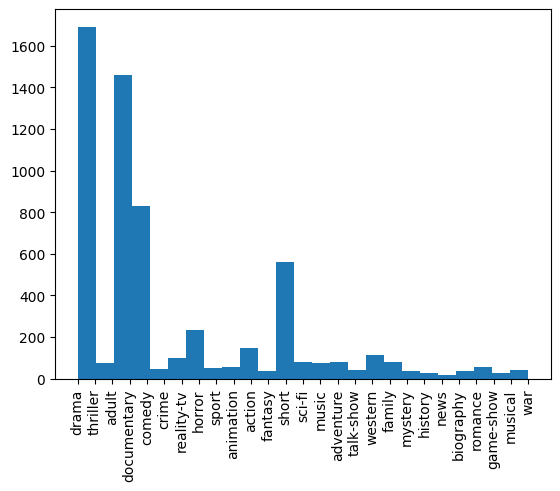

In [80]:
plt.hist(df["Genre"], bins=25)
plt.xticks(rotation=90)

<Axes: ylabel='Genre'>

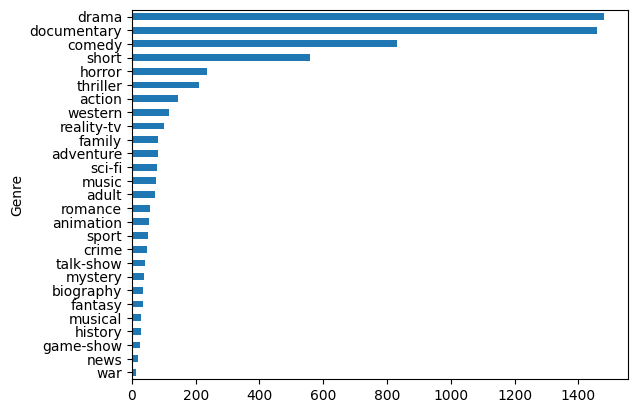

In [81]:
df["Genre"].value_counts().sort_values(ascending=True).plot(kind='barh', alpha=1 )

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 1 to 6000
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          6000 non-null   object
 1   Genre          6000 non-null   object
 2   Description    6000 non-null   object
 3   code of genre  6000 non-null   int32 
 4   Despcription   6000 non-null   object
dtypes: int32(1), object(4)
memory usage: 386.9+ KB


In [83]:
le=LabelEncoder()
df["code of genre"]=le.fit_transform(df["Genre"])
classes = df["Genre"].unique()
classes

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

In [84]:
df.head()

,Title,Genre,Description,code of genre,Despcription
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,8,listening conversation doctor parents 10yearol...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,24,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,1,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,8,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,8,films title refers unrecovered bodies ground z...


In [96]:
x = df["Description"]
y = df["Genre"]

In [97]:
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.3,random_state=42)

In [98]:


vc = CountVectorizer()
xtr1 = vc.fit_transform(x_train)
xte1 =  vc.transform(x_test)

In [100]:


lrmodel=LogisticRegression()
lrmodel.fit(xtr1,y_train)

print("LogisticRegression model train score :",lrmodel.score(xtr1,y_train))
print("LogisticRegression model test score :",lrmodel.score(xte1,y_test))



LogisticRegression model train score : 1.0
LogisticRegression model test score : 0.5033333333333333


C:\Users\ok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
svmodel = LinearSVC()
svmodel.fit(xtr1,y_train)
print("SVM model train score :",svmodel.score(xtr1,y_train))
print("SVM model test score :",svmodel.score(xte1,y_test))

C:\Users\ok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM model train score : 1.0
SVM model test score : 0.48388888888888887


In [106]:
nbmodel = MultinomialNB()
nbmodel.fit(xtr1,y_train)
print("SVM model train score :",nbmodel.score(xtr1,y_train))
print("SVM model test score :",nbmodel.score(xte1,y_test))

SVM model train score : 0.6333333333333333
SVM model test score : 0.4738888888888889


In [108]:
## Using TfidfVectorizer technique
vec = TfidfVectorizer()
xtr2 = vec.fit_transform(x_train)
xte2 =  vec.transform(x_test)

In [110]:
lrmodel2=LogisticRegression()
lrmodel2.fit(xtr2,y_train)

print("LogisticRegression model train score :",lrmodel2.score(xtr2,y_train))
print("LogisticRegression model test score :",lrmodel2.score(xte2,y_test))

LogisticRegression model train score : 0.6421428571428571
LogisticRegression model test score : 0.48944444444444446


C:\Users\ok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
svmodel = LinearSVC()
svmodel.fit(xtr2,y_train)
print("SVM model train score :",svmodel.score(xtr2,y_train))
print("SVM model test score :",svmodel.score(xte2,y_test))

C:\Users\ok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM model train score : 0.9997619047619047
SVM model test score : 0.5277777777777778


In [112]:
nbmodel = MultinomialNB()
nbmodel.fit(xtr2,y_train)
print("SVM model train score :",nbmodel.score(xtr2,y_train))
print("SVM model test score :",nbmodel.score(xte2,y_test))

SVM model train score : 0.47595238095238096
SVM model test score : 0.4461111111111111
